# Housing prices -  regression

Data source is https://www.kaggle.com/c/house-prices-advanced-regression-techniques

"With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home."


### Explore the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
len(data)

1460

In [5]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
descr = data.describe(include='all').transpose()

Inferring from above, for some variables, the data is essentially unimodal (i.e. the most frequently occuring category accountig for a very large part of the samples) and/or contains a hight number of missing values. Hence, we do not expect them to be very relevant predictors. Let's get our hands on these specific features

In [9]:
#note that the coefficients 0.8 and 0.25 are arbitrarily chosen
#the aim is to get rid of some variables with (presumably) limited predictor value
descr_filtered = descr[(descr['freq'] >= 0.8 * 1460) | (descr['count'] <= 0.25 * 1460)]
descr_filtered

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandSlope,1460,3,Gtl,1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition1,1460,9,Norm,1260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition2,1460,8,Norm,1445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BldgType,1460,5,1Fam,1220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoofMatl,1460,8,CompShg,1434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExterCond,1460,5,TA,1282,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
to_be_dropped = list(descr_filtered.index)
to_be_dropped

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Let's get rid of this stuff. While we're at it, let's lose the Id column and MiscVal which, according to docs of the dataset, is directly related to the MiscFeature

In [11]:
data = data.drop(labels=to_be_dropped+['Id', 'MiscVal'], axis=1)

In [12]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,2,2006,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,12,2008,250000


In [13]:
data.shape

(1460, 55)

In [14]:
data.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
LotShape           0
LotConfig          0
Neighborhood       0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
Foundation         0
BsmtQual          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF  

For the FireplaceQu variable we interpret NA values as 'No Fireplace' which we shalle encode 'NFP'

In [15]:
data['FireplaceQu'][data['FireplaceQu'].isna()] = 'NFP'

C:\Users\Panu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
data['FireplaceQu']

0       NFP
1        TA
2        TA
3        Gd
4        TA
5       NFP
6        Gd
7        TA
8        TA
9        TA
10      NFP
11       Gd
12      NFP
13       Gd
14       Fa
15      NFP
16       TA
17      NFP
18      NFP
19      NFP
20       Gd
21       Gd
22       Gd
23       TA
24       TA
25       Gd
26      NFP
27       Gd
28       Gd
29      NFP
30      NFP
31      NFP
32      NFP
33       Gd
34       Gd
35       Gd
36      NFP
37       TA
38      NFP
39      NFP
40       TA
41       Gd
42      NFP
43      NFP
44      NFP
45       Gd
46       Ex
47      NFP
48      NFP
49      NFP
       ... 
1410    NFP
1411    NFP
1412    NFP
1413     Gd
1414     Gd
1415     TA
1416    NFP
1417     TA
1418    NFP
1419     TA
1420     TA
1421     Fa
1422    NFP
1423     Gd
1424     TA
1425    NFP
1426     TA
1427     TA
1428     Gd
1429     TA
1430     Gd
1431    NFP
1432    NFP
1433     TA
1434     Gd
1435     Gd
1436    NFP
1437     Gd
1438    NFP
1439     TA
1440     Gd
1441     TA
1442

Now, let's deal with the remaining missing values

In [17]:
cols_with_nas = list(data.isna().sum()[data.isna().sum() >= 1].index)
cols_with_nas

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish']

For categoricals, we'll need to impute the mode and for numerical columns the median

In [18]:
data[cols_with_nas].dtypes

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtExposure     object
BsmtFinType1     object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
dtype: object

In [19]:
na_fillers = {}
for col in cols_with_nas:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        #numerical column
        col_med = data[col].median()
        na_fillers[col] = col_med
    else:
        #categorical
        col_mode = data[col].mode()[0]
        na_fillers[col] = col_mode


In [20]:
na_fillers

{'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtQual': 'TA',
 'GarageFinish': 'Unf',
 'GarageType': 'Attchd',
 'GarageYrBlt': 1980.0,
 'LotFrontage': 69.0,
 'MasVnrArea': 0.0,
 'MasVnrType': 'None'}

Now that we have the replacement values for the NA's in various columns, go ahead and apply the imputations

In [21]:
data = data.fillna(value=na_fillers)

In [22]:
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MoSold      

Success!

### Handle categorical variables

First off, we'll want to confirm everything that needs to be categorical, is. For each remaining variable, print out the dtype and a random sample of the variable contents

In [23]:
d = {'col' : [], 'dtype': [], 'sample' : [], 'unique' : []}
for col in list(data.keys()):
    d['col'].append(col)
    d['dtype'].append(data[col].dtype)
    d['unique'].append(data[col].nunique())
    d['sample'].append(str(data[col].sample(10).tolist()))

df = pd.DataFrame(d)
df

,col,dtype,sample,unique
0,MSSubClass,int64,"[20, 60, 20, 160, 20, 20, 50, 70, 20, 20]",15
1,MSZoning,object,"['RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL...",5
2,LotFrontage,float64,"[69.0, 65.0, 80.0, 80.0, 80.0, 41.0, 60.0, 93....",110
3,LotArea,int64,"[10463, 10708, 13688, 11988, 12677, 9920, 3196...",1073
4,LotShape,object,"['Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'Re...",4
5,LotConfig,object,"['Inside', 'Inside', 'Inside', 'Corner', 'Insi...",5
6,Neighborhood,object,"['NWAmes', 'SawyerW', 'NAmes', 'Somerst', 'Mit...",25
7,HouseStyle,object,"['1Story', '2Story', '1Story', '1.5Fin', '1Sto...",8
8,OverallQual,int64,"[5, 5, 5, 8, 5, 6, 7, 4, 7, 6]",10
9,OverallCond,int64,"[5, 5, 6, 7, 9, 7, 7, 6, 5, 6]",9


It seems like it could be useful to cast MSSubClass, as well as MoSold into a categorical variable. Let's do it 

In [24]:
data['MSSubClass'] = data['MSSubClass'].astype('object')
data['MoSold'] = data['MoSold'].astype('object')

In [25]:
data[['MSSubClass', 'MoSold']].dtypes

MSSubClass    object
MoSold        object
dtype: object

Now we are ready to implement the actual one-hot encoding

In [26]:
#columns=None for encodig all variables with dtype 'object'
data = pd.get_dummies(data, columns=None )

In [27]:
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),...,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NFP,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2008,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,2007,181500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,2008,223500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2006,140000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,2008,250000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


Phew! That's a lot of columns!

### Train / test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
estimator = LinearRegression(normalize=True)

In [33]:
estimator.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### Evaluate

In [34]:
preds = list(estimator.predict(X_test))

In [35]:
preds

[149664.0,
 344320.0,
 91456.0,
 186816.0,
 338272.0,
 67584.0,
 252320.0,
 150464.0,
 62496.0,
 144512.0,
 129440.0,
 115872.0,
 84928.0,
 238848.0,
 179808.0,
 140096.0,
 194400.0,
 132384.0,
 128096.0,
 212800.0,
 162528.0,
 209152.0,
 176992.0,
 138560.0,
 209536.0,
 132992.0,
 199040.0,
 89952.0,
 168384.0,
 201216.0,
 126688.0,
 274048.0,
 259840.0,
 104128.0,
 245344.0,
 142400.0,
 141824.0,
 209600.0,
 333344.0,
 103168.0,
 144352.0,
 228032.0,
 111040.0,
 334848.0,
 118880.0,
 139168.0,
 111456.0,
 125408.0,
 398464.0,
 138176.0,
 124640.0,
 269952.0,
 81280.0,
 290720.0,
 155648.0,
 220384.0,
 206560.0,
 187648.0,
 125408.0,
 106496.0,
 86176.0,
 175584.0,
 321056.0,
 250688.0,
 301600.0,
 187648.0,
 85152.0,
 289504.0,
 112192.0,
 165888.0,
 124608.0,
 127008.0,
 105888.0,
 47360.0,
 421728.0,
 147520.0,
 299712.0,
 389120.0,
 156768.0,
 128672.0,
 114656.0,
 72672.0,
 104064.0,
 90656.0,
 159040.0,
 140064.0,
 241728.0,
 182240.0,
 141312.0,
 189952.0,
 121120.0,
 173824.0,

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
mae = mean_absolute_error(y_test, preds)

In [38]:
mae

20496.325342465752

### Check for overfitting (unlikely!)

In [39]:
preds_train = list(estimator.predict(X_train))

In [40]:
mean_absolute_error(y_train, preds_train)

16370.067636986301

Well, maybe a slight overfit is actually present

### Discussion

Let's take a look of the distribution of the predicted variable in the original dataset

In [41]:
import matplotlib.pyplot as plt

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <a list of 20 Patch objects>)

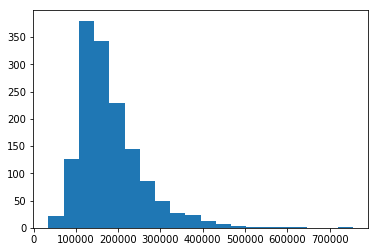

In [52]:
plt.hist(data['SalePrice'], bins=20)

In [48]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

So predicted variable ranges from 34900 to 755000; MAE of ~20000 is not actually that bad. A lot could be done to improve the results though

 - Introduce more variables - rather arbitrarily, we stripped some off in the very beginning, while in retrospect this might not have been "justifiable"
 - Introduce some form of regularisation: Contrary to "gut feeling" for a linear model, lower MAE in the training set actually suggests we are overfitting our data and
 - Try a more complex model, i.e. polynomial features
 - Introduce a different regression algorithm, e.g. a neural network / deep neural net